In [ ]:
import numpy as np
import pandas as pd
import sklearn as sklearn
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense,Dropout

import warnings
from tensorflow import keras
from tensorflow.keras import layers

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/Colab Notebooks/CSV /content

cp: cannot stat '/content/drive/MyDrive/Colab': No such file or directory
cp: cannot stat 'Notebooks/CSV': No such file or directory


In [ ]:
ac_col=['time','ac_x','ac_y','ac_z','a_ac']
gy_col=['time','gy_x','gy_y','gy_z','a_gy']
features=['ac_x','ac_y','ac_z','a_ac','gy_x','gy_y','gy_z','a_gy','jac_x','jac_y','jac_z','ja_ac','jgy_x','jgy_y','jgy_z','ja_gy']

In [ ]:
##### Number of data ###########
f_s=1
f_e=206
fall_number=205
w_s=1
w_e=222
walk_number=221
s_s=1
s_e=250
sit_number=249
bsc_s=1
bsc_e=253
bsc_number=252
laying_s=1
laying_e=247
laying_number=246
standing_s=1
standing_e=218
stand_number=217



Data Processor

In [ ]:
keep_cols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

Feature Map construction

In [ ]:
#### Feature Map construction (Fall) #####
mi_score=[]
partial_mi_score=[]
mean_f=[]
xcorr=[]
pearson_corr=[]
ffm="xcorr_"
for i in range(0,fall_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  xcorr.append(np.array(df).astype(float))

ffm="pearson_corr_"
for i in range(0,fall_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  pearson_corr.append(np.array(df).astype(float))

ffm="mi_"
for i in range(0,fall_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  mi_score.append(np.array(df).astype(float))

ffm="pmi_"
for i in range(0,fall_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  partial_mi_score.append(np.array(df).astype(float))

ffm="mean_"
for i in range(0,fall_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  mean_f.append(np.array(df).astype(float))




In [ ]:
print(len(xcorr))

205


In [ ]:
def heat_map(x):
  #plt.figure(figsize=(15,8))
  f,ax = plt.subplots(figsize=(15, 8))
  sns.heatmap(x, annot=False, linewidths=0.0,ax=ax)
  #sns.heatmap(x,cmap="Greens")

Walk Data

In [ ]:
#### Feature Map construction (Fall) #####
mi_score_walk=[]
partial_mi_score_walk=[]
mean_f_walk=[]
xcorr_walk=[]
pearson_corr_walk=[]
ffm="xcorr_walk_"
for i in range(0,walk_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  xcorr_walk.append(np.array(df).astype(float))

ffm="pearson_corr_walk_"
for i in range(0,walk_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  pearson_corr_walk.append(np.array(df).astype(float))

ffm="mi_walk_"
for i in range(0,walk_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  mi_score_walk.append(np.array(df).astype(float))

ffm="pmi_walk_"
for i in range(0,walk_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  partial_mi_score_walk.append(np.array(df).astype(float))

ffm="mean_walk_"
for i in range(0,walk_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  mean_f_walk.append(np.array(df).astype(float))






In [ ]:
######Sitting feature map

mi_score_sit=[]
partial_mi_score_sit=[]
mean_f_sit=[]
xcorr_sit=[]
pearson_corr_sit=[]
ffm="xcorr_sit_"
for i in range(0,sit_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  xcorr_sit.append(np.array(df).astype(float))

ffm="pearson_corr_sit_"
for i in range(0,sit_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  pearson_corr_sit.append(np.array(df).astype(float))

ffm="mi_sit_"
for i in range(0,sit_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  mi_score_sit.append(np.array(df).astype(float))

ffm="pmi_sit_"
for i in range(0,sit_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  partial_mi_score_sit.append(np.array(df).astype(float))


ffm="mean_sit_"
for i in range(0,sit_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  mean_f_sit.append(np.array(df).astype(float))







In [ ]:
###### BSC feature map


mi_score_bsc=[]
partial_mi_score_bsc=[]
mean_f_bsc=[]
xcorr_bsc=[]
pearson_corr_bsc=[]
ffm="xcorr_bsc_"
for i in range(0,bsc_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  xcorr_bsc.append(np.array(df).astype(float))

ffm="pearson_corr_bsc_"
for i in range(0,bsc_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  pearson_corr_bsc.append(np.array(df).astype(float))

ffm="mi_bsc_"
for i in range(0,bsc_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  mi_score_bsc.append(np.array(df).astype(float))

ffm="pmi_bsc_"
for i in range(0,bsc_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  partial_mi_score_bsc.append(np.array(df).astype(float))

ffm="mean_bsc_"
for i in range(0,bsc_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  mean_f_bsc.append(np.array(df).astype(float))










In [ ]:
######Standting feature map

mi_score_stand=[]
partial_mi_score_stand=[]
mean_f_stand=[]
xcorr_stand=[]
pearson_corr_stand=[]
ffm="xcorr_stand_"
for i in range(0,stand_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  xcorr_stand.append(np.array(df).astype(float))

ffm="pearson_corr_stand_"
for i in range(0,stand_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  pearson_corr_stand.append(np.array(df).astype(float))

ffm="mi_stand_"
for i in range(0,stand_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  mi_score_stand.append(np.array(df).astype(float))

ffm="pmi_stand_"
for i in range(0,stand_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  partial_mi_score_stand.append(np.array(df).astype(float))

ffm="mean_stand_"
for i in range(0,stand_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  mean_f_stand.append(np.array(df).astype(float))




In [ ]:
######Layingting feature map

mi_score_laying=[]
partial_mi_score_laying=[]
mean_f_laying=[]
xcorr_laying=[]
pearson_corr_laying=[]
ffm="xcorr_laying_"
for i in range(0,laying_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  xcorr_laying.append(np.array(df).astype(float))

ffm="pearson_corr_laying_"
for i in range(0,laying_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  pearson_corr_laying.append(np.array(df).astype(float))

ffm="mi_laying_"
for i in range(0,laying_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  mi_score_laying.append(np.array(df).astype(float))

ffm="pmi_laying_"
for i in range(0,laying_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  partial_mi_score_laying.append(np.array(df).astype(float))

ffm="mean_laying_"
for i in range(0,laying_number):
  extra=str(i)+".csv"
  path='/content/drive/MyDrive/Colab Notebooks/Data/'+ffm+extra
  df=pd.read_csv(path,header=None,skiprows=1,usecols=keep_cols)
  mean_f_laying.append(np.array(df).astype(float))



In [ ]:
X_data_xcorr=[]
X_data_pccr=[]
X_data_mi=[]
X_data_pmi=[]
X_data_mean=[]
y_data_xcorr=[]
y_data_pccr=[]
y_data_mi=[]
y_data_pmi=[]
y_data_mean=[]
X_data=[]
y_data=[]


In [ ]:
def add_noise(data, mean=0, std=0.1):
    """
    Add Gaussian noise to the input data.
    """
    noise = np.random.normal(mean, std, data.shape)
    augmented_data = data + noise
    return augmented_data

In [ ]:
pccr_xcorr=[]
pccr_mi=[]
pccr_nmi=[]
pccr_mean=[]

In [ ]:
#### data test construction ############
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()

for i in range(0,fall_number):
  pccr_xcorr_temp=[]
  pccr_mi_temp=[]
  pccr_nmi_temp=[]
  pccr_mean_temp=[]
  xcorr[i]=scaler.fit_transform(xcorr[i])
  mi_score[i]=scaler.fit_transform(mi_score[i])
  partial_mi_score[i]=scaler.fit_transform(partial_mi_score[i])
  mean_f[i]=scaler.fit_transform(mean_f[i])
  pearson_corr[i]=scaler.fit_transform(pearson_corr[i])

  pccr_xcorr_temp.append(pearson_corr[i])
  pccr_xcorr_temp.append(xcorr[i])

  pccr_mi_temp.append(pearson_corr[i])
  pccr_mi_temp.append(mi_score[i])

  pccr_nmi_temp.append(pearson_corr[i])
  pccr_nmi_temp.append(partial_mi_score[i])

  pccr_mean_temp.append(pearson_corr[i])
  pccr_mean_temp.append(mean_f[i])

  pccr_xcorr.append(pccr_xcorr_temp)
  pccr_mi.append(pccr_mi_temp)
  pccr_nmi.append(pccr_nmi_temp)
  pccr_mean.append(pccr_mean_temp)

  y_data.append("Fall")
  #fall_temp.append("Fall")

  #walk_temp=np.stack((xcorr_walk[i],pearson_corr_walk[i],mi_score_walk[i],partial_mi_score_walk[i],mean_f_walk[i]),axis=0)
for i in range(0,walk_number):
  pccr_xcorr_temp=[]
  pccr_mi_temp=[]
  pccr_nmi_temp=[]
  pccr_mean_temp=[]

  xcorr_walk[i]=scaler.fit_transform(xcorr_walk[i])
  mi_score_walk[i]=scaler.fit_transform(mi_score_walk[i])
  partial_mi_score_walk[i]=scaler.fit_transform(partial_mi_score_walk[i])
  mean_f_walk[i]=scaler.fit_transform(mean_f_walk[i])
  pearson_corr_walk[i]=scaler.fit_transform(pearson_corr_walk[i])

  pccr_xcorr_temp.append(pearson_corr_walk[i])
  pccr_xcorr_temp.append(xcorr_walk[i])

  pccr_mi_temp.append(pearson_corr_walk[i])
  pccr_mi_temp.append(mi_score_walk[i])

  pccr_nmi_temp.append(pearson_corr_walk[i])
  pccr_nmi_temp.append(partial_mi_score_walk[i])

  pccr_mean_temp.append(pearson_corr_walk[i])
  pccr_mean_temp.append(mean_f_walk[i])

  pccr_xcorr.append(pccr_xcorr_temp)
  pccr_mi.append(pccr_mi_temp)
  pccr_nmi.append(pccr_nmi_temp)
  pccr_mean.append(pccr_mean_temp)

  y_data.append('Walk')

for i in range(0,sit_number):
  pccr_xcorr_temp=[]
  pccr_mi_temp=[]
  pccr_nmi_temp=[]
  pccr_mean_temp=[]

  xcorr_sit[i]=scaler.fit_transform(xcorr_sit[i])
  mi_score_sit[i]=scaler.fit_transform(mi_score_sit[i])
  partial_mi_score_sit[i]=scaler.fit_transform(partial_mi_score_sit[i])
  mean_f_sit[i]=scaler.fit_transform(mean_f_sit[i])
  pearson_corr_sit[i]=scaler.fit_transform(pearson_corr_sit[i])

  pccr_xcorr_temp.append(pearson_corr_sit[i])
  pccr_xcorr_temp.append(xcorr_sit[i])

  pccr_mi_temp.append(pearson_corr_sit[i])
  pccr_mi_temp.append(mi_score_sit[i])

  pccr_nmi_temp.append(pearson_corr_sit[i])
  pccr_nmi_temp.append(partial_mi_score_sit[i])

  pccr_mean_temp.append(pearson_corr_sit[i])
  pccr_mean_temp.append(mean_f_sit[i])

  pccr_xcorr.append(pccr_xcorr_temp)
  pccr_mi.append(pccr_mi_temp)
  pccr_nmi.append(pccr_nmi_temp)
  pccr_mean.append(pccr_mean_temp)

  y_data.append('Sitting')



for i in range(0,bsc_number):
  pccr_xcorr_temp=[]
  pccr_mi_temp=[]
  pccr_nmi_temp=[]
  pccr_mean_temp=[]

  xcorr_bsc[i]=scaler.fit_transform(xcorr_bsc[i])
  mi_score_bsc[i]=scaler.fit_transform(mi_score_bsc[i])
  partial_mi_score_bsc[i]=scaler.fit_transform(partial_mi_score_bsc[i])
  mean_f_bsc[i]=scaler.fit_transform(mean_f_bsc[i])
  pearson_corr_bsc[i]=scaler.fit_transform(pearson_corr_bsc[i])


  pccr_xcorr_temp.append(pearson_corr_bsc[i])
  pccr_xcorr_temp.append(xcorr_bsc[i])

  pccr_mi_temp.append(pearson_corr_bsc[i])
  pccr_mi_temp.append(mi_score_bsc[i])

  pccr_nmi_temp.append(pearson_corr_bsc[i])
  pccr_nmi_temp.append(partial_mi_score_bsc[i])

  pccr_mean_temp.append(pearson_corr_bsc[i])
  pccr_mean_temp.append(mean_f_bsc[i])

  pccr_xcorr.append(pccr_xcorr_temp)
  pccr_mi.append(pccr_mi_temp)
  pccr_nmi.append(pccr_nmi_temp)
  pccr_mean.append(pccr_mean_temp)




  y_data.append('BSC')



for i in range(0,stand_number):
  pccr_xcorr_temp=[]
  pccr_mi_temp=[]
  pccr_nmi_temp=[]
  pccr_mean_temp=[]

  xcorr_stand[i]=scaler.fit_transform(xcorr_stand[i])
  mi_score_stand[i]=scaler.fit_transform(mi_score_stand[i])
  partial_mi_score_stand[i]=scaler.fit_transform(partial_mi_score_stand[i])
  mean_f_stand[i]=scaler.fit_transform(mean_f_stand[i])
  pearson_corr_stand[i]=scaler.fit_transform(pearson_corr_stand[i])

  pccr_xcorr_temp.append(pearson_corr_stand[i])
  pccr_xcorr_temp.append(xcorr_stand[i])

  pccr_mi_temp.append(pearson_corr_stand[i])
  pccr_mi_temp.append(mi_score_stand[i])

  pccr_nmi_temp.append(pearson_corr_stand[i])
  pccr_nmi_temp.append(partial_mi_score_stand[i])

  pccr_mean_temp.append(pearson_corr_stand[i])
  pccr_mean_temp.append(mean_f_stand[i])

  pccr_xcorr.append(pccr_xcorr_temp)
  pccr_mi.append(pccr_mi_temp)
  pccr_nmi.append(pccr_nmi_temp)
  pccr_mean.append(pccr_mean_temp)


  y_data.append('Standing')




for i in range(0,laying_number):
  pccr_xcorr_temp=[]
  pccr_mi_temp=[]
  pccr_nmi_temp=[]
  pccr_mean_temp=[]

  xcorr_laying[i]=scaler.fit_transform(xcorr_laying[i])
  mi_score_laying[i]=scaler.fit_transform(mi_score_laying[i])
  partial_mi_score_laying[i]=scaler.fit_transform(partial_mi_score_laying[i])
  mean_f_laying[i]=scaler.fit_transform(mean_f_laying[i])
  pearson_corr_laying[i]=scaler.fit_transform(pearson_corr_laying[i])


  pccr_xcorr_temp.append(pearson_corr_laying[i])
  pccr_xcorr_temp.append(xcorr_laying[i])

  pccr_mi_temp.append(pearson_corr_laying[i])
  pccr_mi_temp.append(mi_score_laying[i])

  pccr_nmi_temp.append(pearson_corr_laying[i])
  pccr_nmi_temp.append(partial_mi_score_laying[i])

  pccr_mean_temp.append(pearson_corr_laying[i])
  pccr_mean_temp.append(mean_f_laying[i])

  pccr_xcorr.append(pccr_xcorr_temp)
  pccr_mi.append(pccr_mi_temp)
  pccr_nmi.append(pccr_nmi_temp)
  pccr_mean.append(pccr_mean_temp)
  y_data.append('Laying')


#X_data=pd.DataFrame(data=X_data,columns=[['Xcorr','Pearson','MI','NMI','Mean']])
#y_data=pd.DataFrame(data=y_data,columns=['Label'])


In [ ]:
len(X_data)

0

In [ ]:
####### TEST data train data processing #################
pccr_xcorr=np.array(pccr_xcorr)
pccr_mi=np.array(pccr_mi)
pccr_nmi=np.array(pccr_nmi)
pccr_mean=np.array(pccr_mean)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Conv3D, MaxPool3D
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
print(tf.__version__)

2.11.0


In [ ]:
y_temp=y_data
yenc = sklearn.preprocessing.LabelEncoder()
y_data = yenc.fit_transform(y_data)

In [ ]:
print(pccr_mean.shape)
print(y_data.shape)

(1390, 2, 16, 16)
(1390,)


In [ ]:
class_names=yenc.classes_


In [ ]:
def plot_accuracy(history, epochs, srt):
  # Plot training & validation accuracy values
  srt='Model accuracy using feature: '+srt
  epoch_range = range(1, epochs+1)
  plt.figure(figsize=(16,7))
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title(srt)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')

  plt.show()

def plot_loss(history,epochs,srt):
  # Plot training & validation loss values
  srt='Model loss using feature: '+srt
  epoch_range = range(1, epochs+1)
  plt.figure(figsize=(16,7))
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title(srt)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')

  plt.show()


def calculate_classification_metrics(y_actual, y_pred, labels):

  cm = tf.math.confusion_matrix(y_actual, y_pred)
  tp = np.diag(cm) # Diagonal represents true positives
  precision = dict()
  recall = dict()
  for i in range(len(labels)):
    col = cm[:, i]
    fp = np.sum(col) - tp[i] # Sum of column minus true positive is false negative

    row = cm[i, :]
    fn = np.sum(row) - tp[i] # Sum of row minus true positive, is false negative

    precision[labels[i]] = tp[i] / (tp[i] + fp) # Precision

    recall[labels[i]] = tp[i] / (tp[i] + fn) # Recall

  return precision, recall

def get_actual_predicted_labels(x_test,y_test,model):
  """
    Create a list of actual ground truth values and the predictions from the model.

    Args:
      dataset: An iterable data structure, such as a TensorFlow Dataset, with features and labels.

    Return:
      Ground truth and predicted values for a particular dataset.
  """
  actual = y_test
  predicted = model.predict(x_test)

  actual = tf.stack(actual, axis=0)
  predicted = tf.concat(predicted, axis=0)
  predicted = tf.argmax(predicted, axis=1)

  return actual, predicted


def plot_confusion_matrix(cm, labels, ds_type):
  ds_type="Confusion Matrix for "+ds_type
#  cm = tf.math.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(12, 12)})
  sns.set(font_scale=1.4)
  ax.set_title( ds_type)
  ax.set_xlabel('Predicted Action')
  ax.set_ylabel('Actual Action')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

def conf_mat(y_pred,y_test,class_names):
  plt.figure(figsize=(16, 8))
  sns.set(font="Times New Roman", font_scale=1.25)
  sns.heatmap(sklearn.metrics.confusion_matrix(y_test, y_pred),  annot=True, xticklabels=class_names, yticklabels=class_names, linewidths=0.1, set_xlabel='Predicted', set_ylabel="Actual",
           fmt='g')
  plt.title('Confusion Matrix: CNN', fontsize=15);


def conf_mat2(mat,class_names,title):
  plt.figure(figsize=(16, 8))
  sns.set( font_scale=1.25)
  sns.heatmap(mat,  annot=True, xticklabels=class_names, yticklabels=class_names, linewidths=0.1,
           fmt='g')
  plt.title(title, fontsize=15);

In [ ]:
from tensorflow.keras.regularizers import l2
def get_3d():
  model1 = Sequential()
  model1.add(Conv3D(16, (2, 7,7),kernel_initializer='normal', activation = 'relu', input_shape = (2,16,16,1)))


  model1.add(Conv3D(128, (1, 7,7), activation='relu'))
  model1.add(Dropout(0.25))

  model1.add(Conv3D(128, (1, 3,3), activation='relu'))
  model1.add(Dropout(0.25))

  model1.add(MaxPool3D((1, 2,2)))
  model1.add(BatchNormalization())

  model1.add(Flatten())

  model1.add(Dense(256, activation = 'relu'))
  model1.add(Dropout(0.25))

  model1.add(Dense(6, activation='softmax',kernel_regularizer=l2(0.01)))
  return model1

In [ ]:
no_of_epoch=5000

In [ ]:
def confusion(y_pred,y_test):

  c0=[0,0,0,0,0,0]
  c1=[0,0,0,0,0,0]
  c2=[0,0,0,0,0,0]
  c3=[0,0,0,0,0,0]
  c4=[0,0,0,0,0,0]
  c5=[0,0,0,0,0,0]

  n=len(y_test)
  for i in range (0,n):
    p=y_pred[i]
    q=y_test[i]
    if(p==0):
      c0[q]=c0[q]+1
    elif(p==1):
      c1[q]=c1[q]+1
    elif(p==2):
      c2[q]=c2[q]+1
    elif(p==3):
      c3[q]=c3[q]+1
    elif(p==4):
      c4[q]=c4[q]+1
    elif(p==5):
      c5[q]=c5[q]+1
  cm=[]
  cm.append(c0)
  cm.append(c1)
  cm.append(c2)
  cm.append(c3)
  cm.append(c4)
  cm.append(c5)
  return cm

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="pccr_mean.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#es = EarlyStopping(monitor='val_loss', patience=100, mode='min')
callbacks_list = [checkpoint]

In [ ]:
model4=get_3d()
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 1, 10, 10, 16)     1584      
                                                                 
 conv3d_1 (Conv3D)           (None, 1, 4, 4, 128)      100480    
                                                                 
 dropout (Dropout)           (None, 1, 4, 4, 128)      0         
                                                                 
 conv3d_2 (Conv3D)           (None, 1, 2, 2, 128)      147584    
                                                                 
 dropout_1 (Dropout)         (None, 1, 2, 2, 128)      0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 1, 1, 1, 128)     0         
 )                                                               
                                                        

In [ ]:
y_data=y_temp
yenc = sklearn.preprocessing.LabelEncoder()
y_data = yenc.fit_transform(y_data)
X_train, X_test, y_train, y_test = train_test_split(pccr_mean, y_data, test_size = 0.20, random_state = 42)

#X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 2,16, 16,1)
X_test = X_test.reshape(X_test.shape[0],2, 16,16,1)
print(X_train.shape)

(1112, 2, 16, 16, 1)


In [ ]:
model4.compile(optimizer=Adam(learning_rate = 0.00001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history4 = model4.fit(X_train, y_train,batch_size = 32, epochs = 5000, validation_data= (X_test, y_test),callbacks=callbacks_list,verbose=2)



Streaming output truncated to the last 5000 lines.
Epoch 3751/5000

Epoch 3751: val_accuracy did not improve from 0.86331
35/35 - 2s - loss: 7.2645e-04 - accuracy: 1.0000 - val_loss: 0.6818 - val_accuracy: 0.8489 - 2s/epoch - 45ms/step
Epoch 3752/5000

Epoch 3752: val_accuracy did not improve from 0.86331
35/35 - 2s - loss: 7.4610e-04 - accuracy: 1.0000 - val_loss: 0.6901 - val_accuracy: 0.8345 - 2s/epoch - 45ms/step
Epoch 3753/5000

Epoch 3753: val_accuracy did not improve from 0.86331
35/35 - 2s - loss: 7.2148e-04 - accuracy: 1.0000 - val_loss: 0.6916 - val_accuracy: 0.8345 - 2s/epoch - 45ms/step
Epoch 3754/5000

Epoch 3754: val_accuracy did not improve from 0.86331
35/35 - 2s - loss: 7.8591e-04 - accuracy: 1.0000 - val_loss: 0.6604 - val_accuracy: 0.8417 - 2s/epoch - 49ms/step
Epoch 3755/5000

Epoch 3755: val_accuracy did not improve from 0.86331
35/35 - 3s - loss: 7.1664e-04 - accuracy: 1.0000 - val_loss: 0.6570 - val_accuracy: 0.8381 - 3s/epoch - 77ms/step
Epoch 3756/5000

Epoch 3

In [ ]:
from sklearn.metrics import accuracy_score
modelp = keras.models.load_model("pccr_mean.best.hdf5")
y_pred = modelp.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print("Test Accuracy",accuracy_score(y_test, y_pred)*100,"%")

scores = modelp.evaluate(X_train, y_train)
print("Train %s: %.2f%%" % (modelp.metrics_names[1], scores[1]*100))

scores = modelp.evaluate(X_test, y_test)
print("test %s: %.2f%%" % (modelp.metrics_names[1], scores[1]*100))


9/9 [==============================] - 0s 9ms/step
Test Accuracy 86.33093525179856 %
35/35 [==============================] - 1s 9ms/step - loss: 0.0038 - accuracy: 1.0000
Train accuracy: 100.00%
9/9 [==============================] - 0s 9ms/step - loss: 0.6142 - accuracy: 0.8633
test accuracy: 86.33%


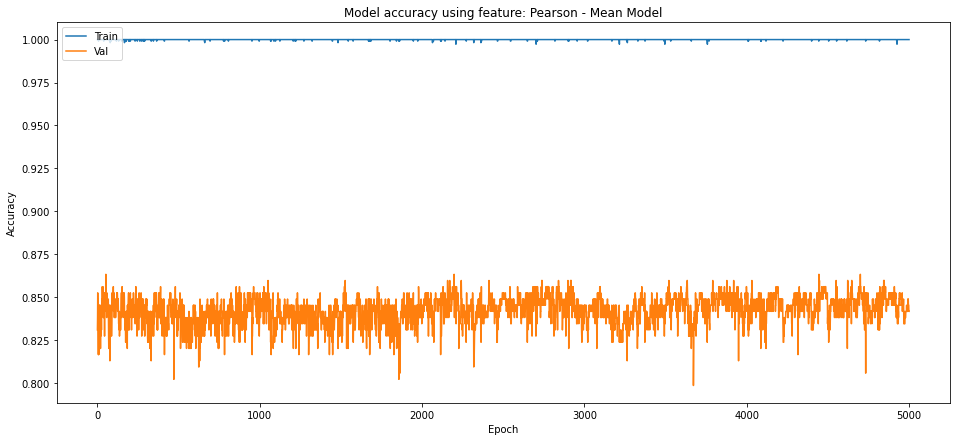

In [ ]:
srt="Pearson - Mean Model"
plot_accuracy(history4, no_of_epoch,srt)

In [ ]:
plot_loss(history4,no_of_epoch, srt)

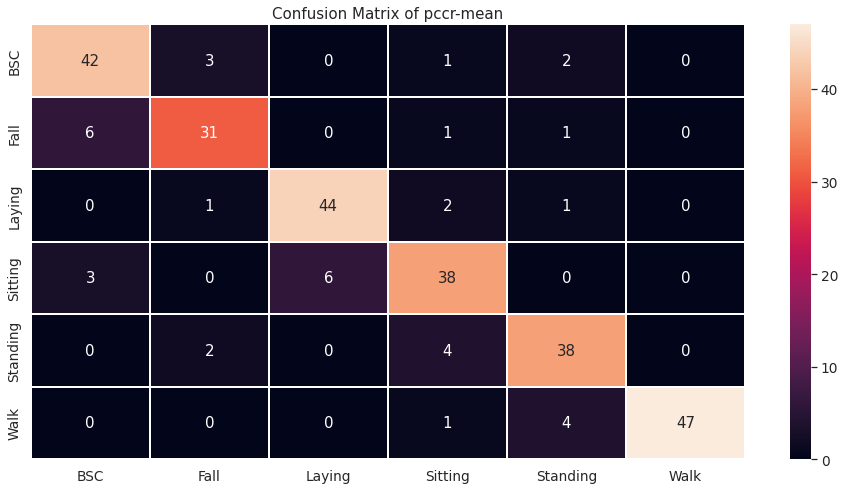

In [ ]:
title="Confusion Matrix of pccr-mean"
cm=confusion(y_pred,y_test)
conf_mat2(cm,class_names,title)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        51
           1       0.79      0.84      0.82        37
           2       0.92      0.88      0.90        50
           3       0.81      0.81      0.81        47
           4       0.86      0.83      0.84        46
           5       0.90      1.00      0.95        47

    accuracy                           0.86       278
   macro avg       0.86      0.86      0.86       278
weighted avg       0.86      0.86      0.86       278



In [ ]:
modelp.save("pccr-mean.h5")
from google.colab import files
files.download("pccr-mean.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pccr_xcorr_mi=[]

In [ ]:
#### data test construction ############
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()

for i in range(0,fall_number):
  temp=[]

  temp.append(pearson_corr[i])
  temp.append(xcorr[i])
  temp.append(mi_score[i])

  pccr_xcorr_mi.append(temp)



  #walk_temp=np.stack((xcorr_walk[i],pearson_corr_walk[i],mi_score_walk[i],partial_mi_score_walk[i],mean_f_walk[i]),axis=0)
for i in range(0,walk_number):
  temp=[]


  temp.append(pearson_corr_walk[i])
  temp.append(xcorr_walk[i])
  temp.append(mi_score_walk[i])

  pccr_xcorr_mi.append(temp)


for i in range(0,sit_number):
  temp=[]


  temp.append(pearson_corr_sit[i])
  temp.append(xcorr_sit[i])
  temp.append(mi_score_sit[i])

  pccr_xcorr_mi.append(temp)





for i in range(0,bsc_number):
  temp=[]

  temp.append(pearson_corr_bsc[i])
  temp.append(xcorr_bsc[i])
  temp.append(mi_score_bsc[i])

  pccr_xcorr_mi.append(temp)




for i in range(0,stand_number):
  temp=[]

  temp.append(pearson_corr_stand[i])
  temp.append(xcorr_stand[i])
  temp.append(mi_score_stand[i])

  pccr_xcorr_mi.append(temp)




for i in range(0,laying_number):
  temp=[]

  temp.append(pearson_corr_laying[i])
  temp.append(xcorr_laying[i])
  temp.append(mi_score_laying[i])

  pccr_xcorr_mi.append(temp)







#X_data=pd.DataFrame(data=X_data,columns=[['Xcorr','Pearson','MI','NMI','Mean']])
#y_data=pd.DataFrame(data=y_data,columns=['Label'])


In [ ]:
from tensorflow.keras.regularizers import l2
def get_3d_2():
  model1 = Sequential()
  model1.add(Conv3D(16, (2, 7,7),kernel_initializer='normal', activation = 'relu', input_shape = (3,16,16,1)))


  model1.add(Conv3D(128, (1, 7,7), activation='relu'))
  model1.add(Dropout(0.25))

  model1.add(Conv3D(128, (1, 3,3), activation='relu'))
  model1.add(Dropout(0.25))

  model1.add(MaxPool3D((1, 2,2)))
  model1.add(BatchNormalization())

  model1.add(Flatten())

  model1.add(Dense(256, activation = 'relu'))
  model1.add(Dropout(0.25))

  model1.add(Dense(6, activation='softmax',kernel_regularizer=l2(0.01)))
  return model1

In [ ]:
pccr_xcorr_mi=np.array(pccr_xcorr_mi)
print(pccr_xcorr_mi.shape)

(1390, 3, 16, 16)


In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="pccr_xcorr_mi.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#es = EarlyStopping(monitor='val_loss', patience=100, mode='min')
callbacks_list = [checkpoint]

In [ ]:
y_data=y_temp
yenc = sklearn.preprocessing.LabelEncoder()
y_data = yenc.fit_transform(y_data)
X_train, X_test, y_train, y_test = train_test_split(pccr_xcorr_mi, y_data, test_size = 0.20, random_state = 42)

#X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 3,16, 16,1)
X_test = X_test.reshape(X_test.shape[0],3, 16,16,1)
print(X_train.shape)

(1112, 3, 16, 16, 1)


In [ ]:
model5=get_3d_2()
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 2, 10, 10, 16)     1584      
                                                                 
 conv3d_1 (Conv3D)           (None, 2, 4, 4, 128)      100480    
                                                                 
 dropout (Dropout)           (None, 2, 4, 4, 128)      0         
                                                                 
 conv3d_2 (Conv3D)           (None, 2, 2, 2, 128)      147584    
                                                                 
 dropout_1 (Dropout)         (None, 2, 2, 2, 128)      0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 2, 1, 1, 128)     0         
 )                                                               
                                                        

In [ ]:
model5.compile(optimizer=Adam(learning_rate = 0.00001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history5 = model5.fit(X_train, y_train,batch_size = 32, epochs = no_of_epoch, validation_data= (X_test, y_test),callbacks=callbacks_list,verbose=2)

Streaming output truncated to the last 5000 lines.
Epoch 3751/5000

Epoch 3751: val_accuracy did not improve from 0.85252
35/35 - 3s - loss: 1.7567e-04 - accuracy: 1.0000 - val_loss: 0.7020 - val_accuracy: 0.8165 - 3s/epoch - 85ms/step
Epoch 3752/5000

Epoch 3752: val_accuracy did not improve from 0.85252
35/35 - 3s - loss: 1.7470e-04 - accuracy: 1.0000 - val_loss: 0.7061 - val_accuracy: 0.8309 - 3s/epoch - 85ms/step
Epoch 3753/5000

Epoch 3753: val_accuracy did not improve from 0.85252
35/35 - 3s - loss: 1.7453e-04 - accuracy: 1.0000 - val_loss: 0.7095 - val_accuracy: 0.8201 - 3s/epoch - 93ms/step
Epoch 3754/5000

Epoch 3754: val_accuracy did not improve from 0.85252
35/35 - 4s - loss: 1.7386e-04 - accuracy: 1.0000 - val_loss: 0.6951 - val_accuracy: 0.8273 - 4s/epoch - 109ms/step
Epoch 3755/5000

Epoch 3755: val_accuracy did not improve from 0.85252
35/35 - 3s - loss: 1.7985e-04 - accuracy: 1.0000 - val_loss: 0.6909 - val_accuracy: 0.8273 - 3s/epoch - 85ms/step
Epoch 3756/5000

Epoch 

In [ ]:
from sklearn.metrics import accuracy_score
modelp = keras.models.load_model("pccr_xcorr_mi.best.hdf5")
y_pred = modelp.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print("Test Accuracy",accuracy_score(y_test, y_pred)*100,"%")

scores = modelp.evaluate(X_train, y_train)
print("Train %s: %.2f%%" % (modelp.metrics_names[1], scores[1]*100))

scores = modelp.evaluate(X_test, y_test)
print("test %s: %.2f%%" % (modelp.metrics_names[1], scores[1]*100))

9/9 [==============================] - 0s 9ms/step
Test Accuracy 85.25179856115108 %
35/35 [==============================] - 1s 9ms/step - loss: 4.9293e-04 - accuracy: 1.0000
Train accuracy: 100.00%
9/9 [==============================] - 0s 15ms/step - loss: 0.6582 - accuracy: 0.8525
test accuracy: 85.25%


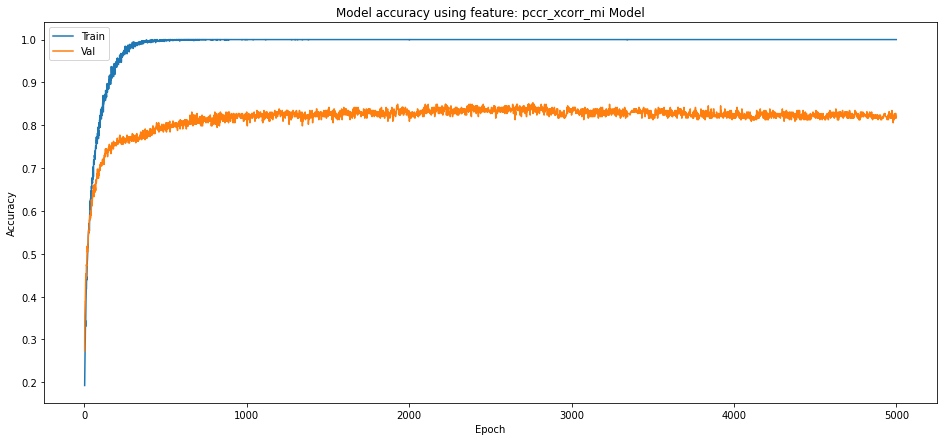

In [ ]:
srt="pccr_xcorr_mi Model"
plot_accuracy(history5, no_of_epoch,srt)

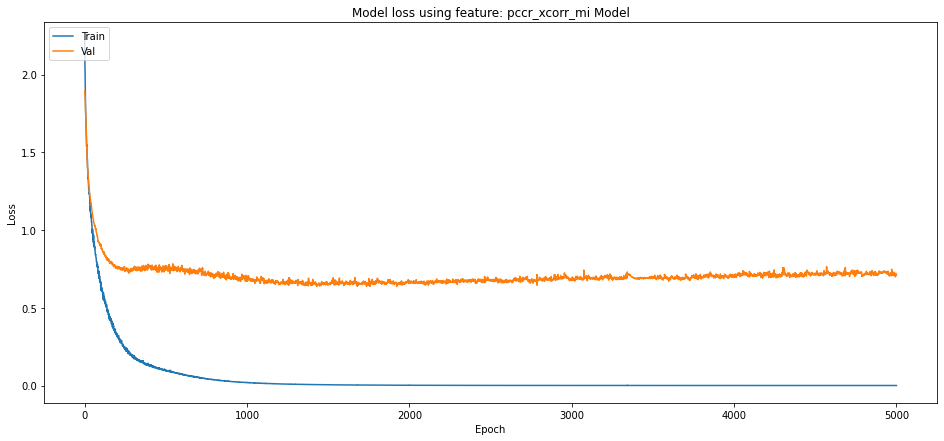

In [ ]:
plot_loss(history5,no_of_epoch, srt)

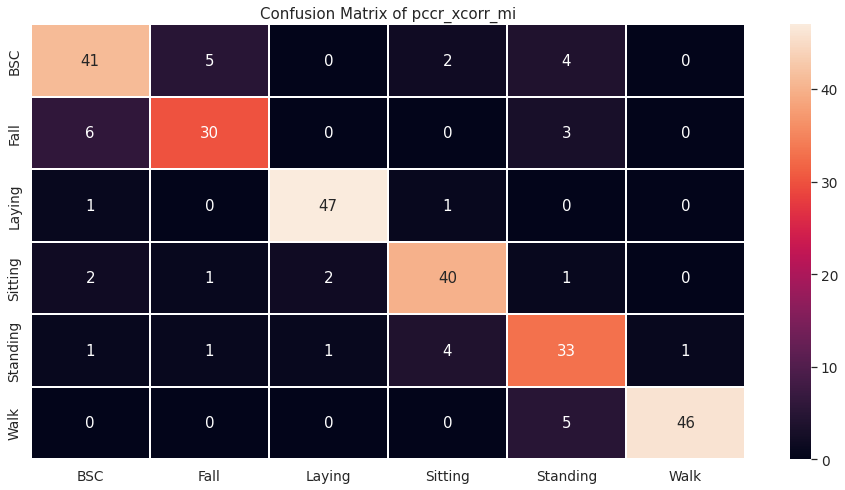

In [ ]:
title="Confusion Matrix of pccr_xcorr_mi"
cm=confusion(y_pred,y_test)
conf_mat2(cm,class_names,title)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        51
           1       0.77      0.81      0.79        37
           2       0.96      0.94      0.95        50
           3       0.87      0.85      0.86        47
           4       0.80      0.72      0.76        46
           5       0.90      0.98      0.94        47

    accuracy                           0.85       278
   macro avg       0.85      0.85      0.85       278
weighted avg       0.85      0.85      0.85       278



In [ ]:
modelp.save("pccr_xcorr_mi.h5")
from google.colab import files
files.download("pccr_xcorr_mi.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pccr_xcorr_nmi=[]

In [ ]:
#### data test construction ############
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()

for i in range(0,fall_number):
  temp=[]

  temp.append(pearson_corr[i])
  temp.append(xcorr[i])
  temp.append(partial_mi_score[i])

  pccr_xcorr_nmi.append(temp)



  #walk_temp=np.stack((xcorr_walk[i],pearson_corr_walk[i],mi_score_walk[i],partial_mi_score_walk[i],mean_f_walk[i]),axis=0)
for i in range(0,walk_number):
  temp=[]


  temp.append(pearson_corr_walk[i])
  temp.append(xcorr_walk[i])
  temp.append(partial_mi_score_walk[i])

  pccr_xcorr_nmi.append(temp)


for i in range(0,sit_number):
  temp=[]


  temp.append(pearson_corr_sit[i])
  temp.append(xcorr_sit[i])
  temp.append(partial_mi_score_sit[i])

  pccr_xcorr_nmi.append(temp)





for i in range(0,bsc_number):
  temp=[]

  temp.append(pearson_corr_bsc[i])
  temp.append(xcorr_bsc[i])
  temp.append(partial_mi_score_bsc[i])

  pccr_xcorr_nmi.append(temp)




for i in range(0,stand_number):
  temp=[]

  temp.append(pearson_corr_stand[i])
  temp.append(xcorr_stand[i])
  temp.append(partial_mi_score_stand[i])

  pccr_xcorr_nmi.append(temp)




for i in range(0,laying_number):
  temp=[]

  temp.append(pearson_corr_laying[i])
  temp.append(xcorr_laying[i])
  temp.append(partial_mi_score_laying[i])

  pccr_xcorr_nmi.append(temp)




In [ ]:
pccr_xcorr_nmi=np.array(pccr_xcorr_nmi)
print(pccr_xcorr_nmi.shape)

(1390, 3, 16, 16)


In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="pccr_xcorr_nmi.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#es = EarlyStopping(monitor='val_loss', patience=100, mode='min')
callbacks_list = [checkpoint]

In [ ]:
y_data=y_temp
yenc = sklearn.preprocessing.LabelEncoder()
y_data = yenc.fit_transform(y_data)
X_train, X_test, y_train, y_test = train_test_split(pccr_xcorr_nmi, y_data, test_size = 0.20, random_state = 42)

#X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 3,16, 16,1)
X_test = X_test.reshape(X_test.shape[0],3, 16,16,1)
print(X_train.shape)

(1112, 3, 16, 16, 1)


In [ ]:
model6=get_3d_2()
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 2, 10, 10, 16)     1584      
                                                                 
 conv3d_1 (Conv3D)           (None, 2, 4, 4, 128)      100480    
                                                                 
 dropout (Dropout)           (None, 2, 4, 4, 128)      0         
                                                                 
 conv3d_2 (Conv3D)           (None, 2, 2, 2, 128)      147584    
                                                                 
 dropout_1 (Dropout)         (None, 2, 2, 2, 128)      0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 2, 1, 1, 128)     0         
 )                                                               
                                                        

In [ ]:
model6.compile(optimizer=Adam(learning_rate = 0.00001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history6 = model6.fit(X_train, y_train,batch_size = 32, epochs = no_of_epoch, validation_data= (X_test, y_test),callbacks=callbacks_list,verbose=2)

Streaming output truncated to the last 5000 lines.
Epoch 3749/5000

Epoch 3749: val_accuracy did not improve from 0.85612
35/35 - 2s - loss: 2.1067e-04 - accuracy: 1.0000 - val_loss: 0.7535 - val_accuracy: 0.8381 - 2s/epoch - 71ms/step
Epoch 3750/5000

Epoch 3750: val_accuracy did not improve from 0.85612
35/35 - 3s - loss: 2.0892e-04 - accuracy: 1.0000 - val_loss: 0.7546 - val_accuracy: 0.8417 - 3s/epoch - 73ms/step
Epoch 3751/5000

Epoch 3751: val_accuracy did not improve from 0.85612
35/35 - 3s - loss: 2.1426e-04 - accuracy: 1.0000 - val_loss: 0.7462 - val_accuracy: 0.8453 - 3s/epoch - 72ms/step
Epoch 3752/5000

Epoch 3752: val_accuracy did not improve from 0.85612
35/35 - 4s - loss: 2.1147e-04 - accuracy: 1.0000 - val_loss: 0.7526 - val_accuracy: 0.8381 - 4s/epoch - 120ms/step
Epoch 3753/5000

Epoch 3753: val_accuracy did not improve from 0.85612
35/35 - 3s - loss: 2.0582e-04 - accuracy: 1.0000 - val_loss: 0.7501 - val_accuracy: 0.8417 - 3s/epoch - 77ms/step
Epoch 3754/5000

Epoch 

In [ ]:
from sklearn.metrics import accuracy_score
modelp = keras.models.load_model("pccr_xcorr_nmi.best.hdf5")
y_pred = modelp.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print("Test Accuracy",accuracy_score(y_test, y_pred)*100,"%")
scores = modelp.evaluate(X_train, y_train)
print("Train %s: %.2f%%" % (modelp.metrics_names[1], scores[1]*100))
scores = modelp.evaluate(X_test, y_test)
print("test %s: %.2f%%" % (modelp.metrics_names[1], scores[1]*100))

9/9 [==============================] - 0s 15ms/step
Test Accuracy 85.61151079136691 %
35/35 [==============================] - 1s 29ms/step - loss: 5.3804e-04 - accuracy: 1.0000
Train accuracy: 100.00%
9/9 [==============================] - 0s 29ms/step - loss: 0.7005 - accuracy: 0.8561
test accuracy: 85.61%


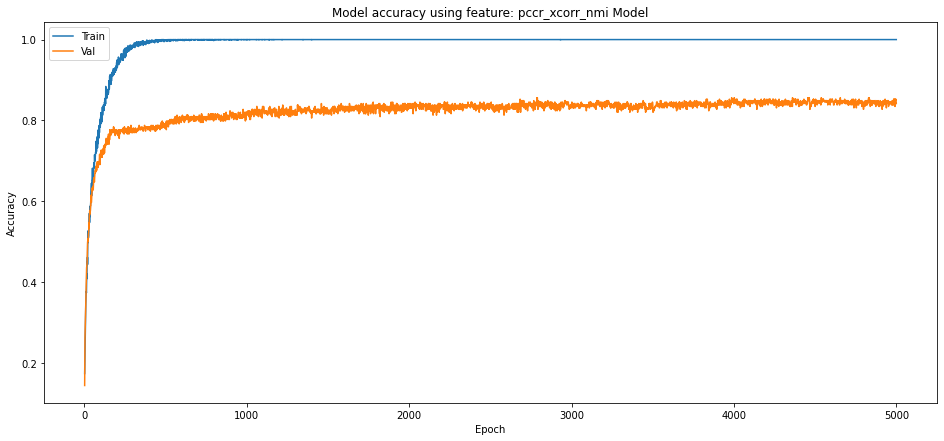

In [ ]:
srt="pccr_xcorr_nmi Model"
plot_accuracy(history6, no_of_epoch,srt)

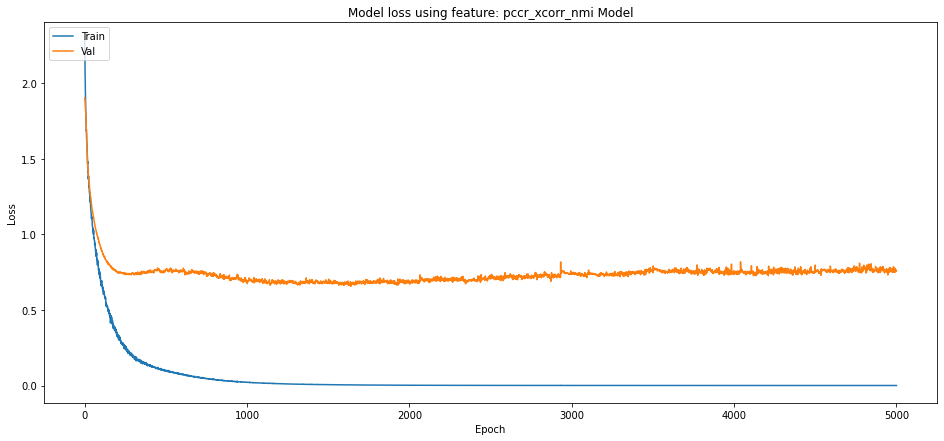

In [ ]:
plot_loss(history6,no_of_epoch, srt)

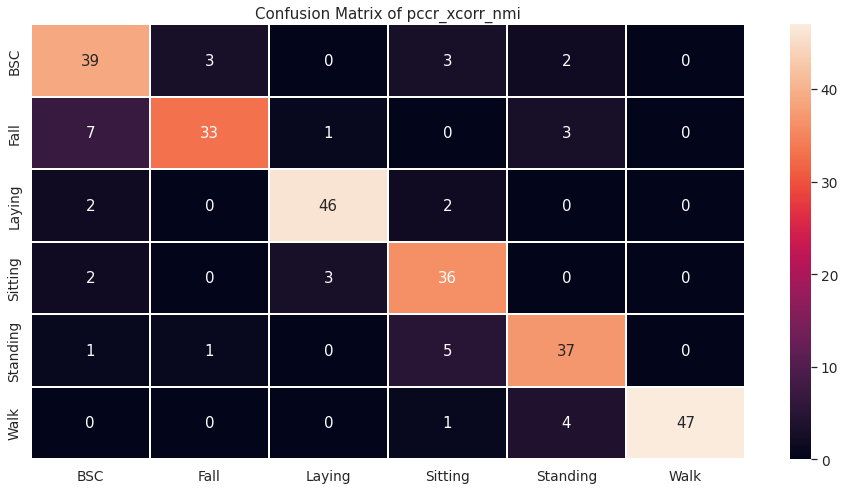

In [ ]:

title="Confusion Matrix of pccr_xcorr_nmi"
cm=confusion(y_pred,y_test)
conf_mat2(cm,class_names,title)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80        51
           1       0.75      0.89      0.81        37
           2       0.92      0.92      0.92        50
           3       0.88      0.77      0.82        47
           4       0.84      0.80      0.82        46
           5       0.90      1.00      0.95        47

    accuracy                           0.86       278
   macro avg       0.85      0.86      0.85       278
weighted avg       0.86      0.86      0.85       278



In [ ]:
modelp.save("pccr_xcorr_nmi.h5")
from google.colab import files
files.download("pccr_xcorr_nmi.h5")

In [ ]:
pccr_mi_mean=[]

In [ ]:
#### data test construction ############
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()

for i in range(0,fall_number):
  temp=[]


  temp.append(pearson_corr[i])
  temp.append(mi_score[i])
  temp.append(mean_f[i])

  pccr_mi_mean.append(temp)





  #walk_temp=np.stack((xcorr_walk[i],pearson_corr_walk[i],mi_score_walk[i],partial_mi_score_walk[i],mean_f_walk[i]),axis=0)
for i in range(0,walk_number):
  temp=[]


  temp.append(pearson_corr_walk[i])
  temp.append(mi_score_walk[i])
  temp.append(mean_f_walk[i])

  pccr_mi_mean.append(temp)


for i in range(0,sit_number):
  temp=[]


  temp.append(pearson_corr_sit[i])
  temp.append(mi_score_sit[i])
  temp.append(mean_f_sit[i])

  pccr_mi_mean.append(temp)




for i in range(0,bsc_number):
  temp=[]




  temp.append(pearson_corr_bsc[i])
  temp.append(mi_score_bsc[i])
  temp.append(mean_f_bsc[i])

  pccr_mi_mean.append(temp)





for i in range(0,stand_number):
  temp=[]


  temp.append(pearson_corr_stand[i])
  temp.append(mi_score_stand[i])
  temp.append(mean_f_stand[i])

  pccr_mi_mean.append(temp)


for i in range(0,laying_number):
  temp=[]




  temp.append(pearson_corr_laying[i])
  temp.append(mi_score_laying[i])
  temp.append(mean_f_laying[i])

  pccr_mi_mean.append(temp)





#X_data=pd.DataFrame(data=X_data,columns=[['Xcorr','Pearson','MI','NMI','Mean']])
#y_data=pd.DataFrame(data=y_data,columns=['Label'])


In [ ]:
pccr_mi_mean=np.array(pccr_mi_mean)
print(pccr_mi_mean.shape)

(1390, 3, 16, 16)


In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="pccr_mi_mean.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#es = EarlyStopping(monitor='val_loss', patience=100, mode='min')
callbacks_list = [checkpoint]

In [ ]:
y_data=y_temp
yenc = sklearn.preprocessing.LabelEncoder()
y_data = yenc.fit_transform(y_data)
X_train, X_test, y_train, y_test = train_test_split(pccr_mi_mean, y_data, test_size = 0.20, random_state = 42)

#X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 3,16, 16,1)
X_test = X_test.reshape(X_test.shape[0],3, 16,16,1)
print(X_train.shape)

(1112, 3, 16, 16, 1)


In [ ]:
model7=get_3d_2()
model7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_3 (Conv3D)           (None, 2, 10, 10, 16)     1584      
                                                                 
 conv3d_4 (Conv3D)           (None, 2, 4, 4, 128)      100480    
                                                                 
 dropout_3 (Dropout)         (None, 2, 4, 4, 128)      0         
                                                                 
 conv3d_5 (Conv3D)           (None, 2, 2, 2, 128)      147584    
                                                                 
 dropout_4 (Dropout)         (None, 2, 2, 2, 128)      0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 2, 1, 1, 128)     0         
 3D)                                                             
                                                      

In [ ]:
model7.compile(optimizer=Adam(learning_rate = 0.00001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history7 = model7.fit(X_train, y_train,batch_size = 32, epochs = no_of_epoch, validation_data= (X_test, y_test),callbacks=callbacks_list,verbose=2)

Streaming output truncated to the last 5000 lines.
Epoch 3751/5000

Epoch 3751: val_accuracy did not improve from 0.85971
35/35 - 2s - loss: 6.3064e-04 - accuracy: 1.0000 - val_loss: 0.6930 - val_accuracy: 0.8165 - 2s/epoch - 66ms/step
Epoch 3752/5000

Epoch 3752: val_accuracy did not improve from 0.85971
35/35 - 2s - loss: 7.0698e-04 - accuracy: 1.0000 - val_loss: 0.6823 - val_accuracy: 0.8237 - 2s/epoch - 67ms/step
Epoch 3753/5000

Epoch 3753: val_accuracy did not improve from 0.85971
35/35 - 2s - loss: 6.4101e-04 - accuracy: 1.0000 - val_loss: 0.6925 - val_accuracy: 0.8165 - 2s/epoch - 66ms/step
Epoch 3754/5000

Epoch 3754: val_accuracy did not improve from 0.85971
35/35 - 4s - loss: 6.5749e-04 - accuracy: 1.0000 - val_loss: 0.6929 - val_accuracy: 0.8165 - 4s/epoch - 106ms/step
Epoch 3755/5000

Epoch 3755: val_accuracy did not improve from 0.85971
35/35 - 2s - loss: 6.3683e-04 - accuracy: 1.0000 - val_loss: 0.6943 - val_accuracy: 0.8165 - 2s/epoch - 71ms/step
Epoch 3756/5000

Epoch 

In [ ]:
from sklearn.metrics import accuracy_score
modelp = keras.models.load_model("pccr_mi_mean.best.hdf5")
y_pred = modelp.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print("Test Accuracy",accuracy_score(y_test, y_pred)*100,"%")

scores = modelp.evaluate(X_train, y_train)
print("Train %s: %.2f%%" % (modelp.metrics_names[1], scores[1]*100))

scores = modelp.evaluate(X_test, y_test)
print("test %s: %.2f%%" % (modelp.metrics_names[1], scores[1]*100))

9/9 [==============================] - 1s 29ms/step
Test Accuracy 85.97122302158273 %
35/35 [==============================] - 1s 27ms/step - loss: 0.0344 - accuracy: 1.0000
Train accuracy: 100.00%
9/9 [==============================] - 0s 25ms/step - loss: 0.6219 - accuracy: 0.8597
test accuracy: 85.97%


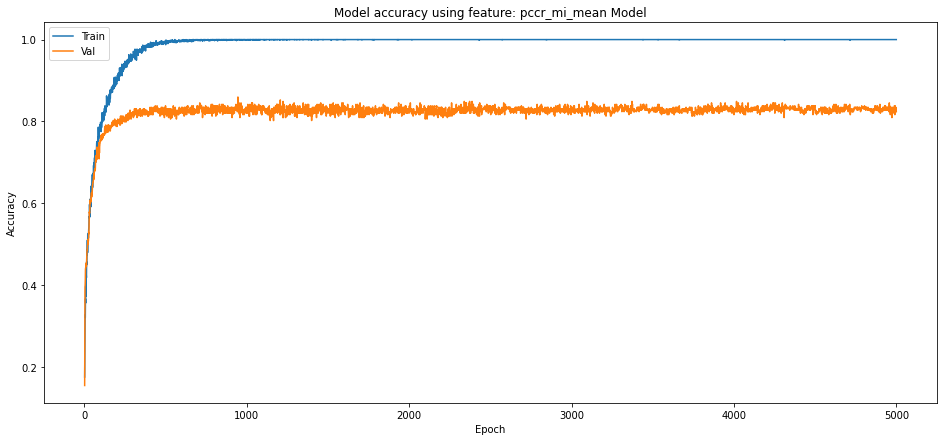

In [ ]:
srt="pccr_mi_mean Model"
plot_accuracy(history7, no_of_epoch,srt)

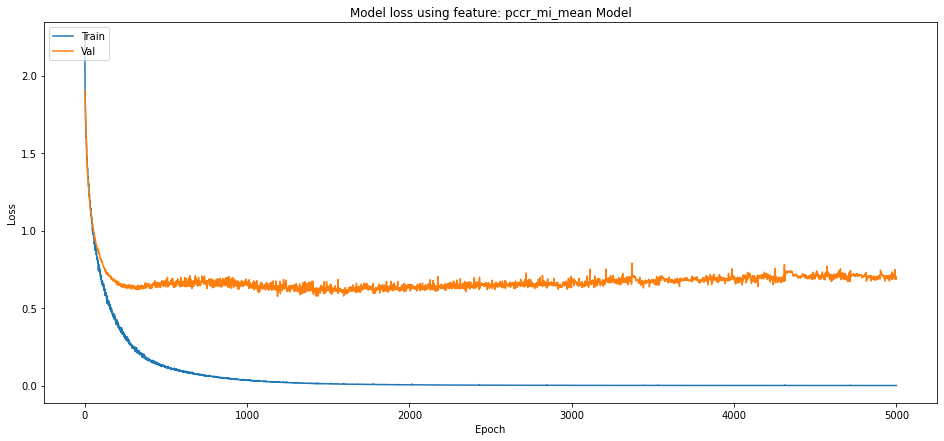

In [ ]:
plot_loss(history7,no_of_epoch, srt)

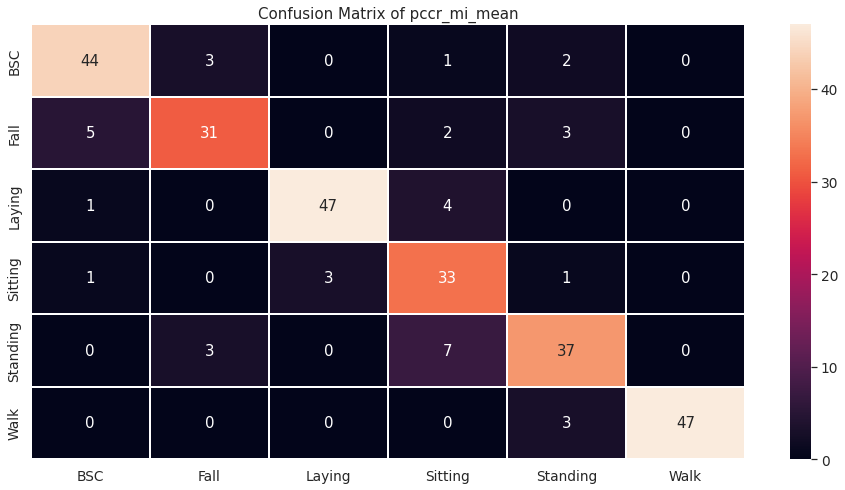

In [ ]:
title="Confusion Matrix of pccr_mi_mean"
cm=confusion(y_pred,y_test)
conf_mat2(cm,class_names,title)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        51
           1       0.76      0.84      0.79        37
           2       0.90      0.94      0.92        50
           3       0.87      0.70      0.78        47
           4       0.79      0.80      0.80        46
           5       0.94      1.00      0.97        47

    accuracy                           0.86       278
   macro avg       0.86      0.86      0.85       278
weighted avg       0.86      0.86      0.86       278



In [ ]:
modelp.save("pccr_mi_mean.h5")
from google.colab import files
files.download("pccr_mi_mean.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
xcorr_mi_nmi_mean=[]

In [ ]:
#### data test construction ############
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()

for i in range(0,fall_number):
  temp=[]

  temp.append(xcorr[i])
  temp.append(mi_score[i])
  temp.append(partial_mi_score[i])
  temp.append(mean_f[i])

  xcorr_mi_nmi_mean.append(temp)





  #walk_temp=np.stack((xcorr_walk[i],pearson_corr_walk[i],mi_score_walk[i],partial_mi_score_walk[i],mean_f_walk[i]),axis=0)
for i in range(0,walk_number):
  temp=[]



  temp.append(xcorr_walk[i])
  temp.append(mi_score_walk[i])
  temp.append(partial_mi_score_walk[i])
  temp.append(mean_f_walk[i])

  xcorr_mi_nmi_mean.append(temp)


for i in range(0,sit_number):
  temp=[]

  temp.append(xcorr_sit[i])
  temp.append(mi_score_sit[i])
  temp.append(partial_mi_score_sit[i])
  temp.append(mean_f_sit[i])

  xcorr_mi_nmi_mean.append(temp)




for i in range(0,bsc_number):
  temp=[]



  temp.append(xcorr_bsc[i])
  temp.append(mi_score_bsc[i])
  temp.append(partial_mi_score_bsc[i])
  temp.append(mean_f_bsc[i])

  xcorr_mi_nmi_mean.append(temp)





for i in range(0,stand_number):
  temp=[]

  temp.append(xcorr_stand[i])
  temp.append(mi_score_stand[i])
  temp.append(partial_mi_score_stand[i])
  temp.append(mean_f_stand[i])

  xcorr_mi_nmi_mean.append(temp)


for i in range(0,laying_number):
  temp=[]


  temp.append(xcorr_laying[i])
  temp.append(mi_score_laying[i])
  temp.append(partial_mi_score_laying[i])
  temp.append(mean_f_laying[i])

  xcorr_mi_nmi_mean.append(temp)





#X_data=pd.DataFrame(data=X_data,columns=[['Xcorr','Pearson','MI','NMI','Mean']])
#y_data=pd.DataFrame(data=y_data,columns=['Label'])


In [ ]:
xcorr_mi_nmi_mean=np.array(xcorr_mi_nmi_mean)
print(xcorr_mi_nmi_mean.shape)

(1390, 4, 16, 16)


In [ ]:
from tensorflow.keras.regularizers import l2
def get_3d_3():
  model1 = Sequential()
  model1.add(Conv3D(16, (2, 7,7),kernel_initializer='normal', activation = 'relu', input_shape = (4,16,16,1)))


  model1.add(Conv3D(128, (1, 7,7), activation='relu'))
  model1.add(Dropout(0.25))

  model1.add(Conv3D(128, (1, 3,3), activation='relu'))
  model1.add(Dropout(0.25))

  model1.add(MaxPool3D((1, 2,2)))
  model1.add(BatchNormalization())

  model1.add(Flatten())

  model1.add(Dense(256, activation = 'relu'))
  model1.add(Dropout(0.25))

  model1.add(Dense(6, activation='softmax',kernel_regularizer=l2(0.01)))
  return model1

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="xcorr_mi_nmi_mean.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#es = EarlyStopping(monitor='val_loss', patience=100, mode='min')
callbacks_list = [checkpoint]

In [ ]:
y_data=y_temp
yenc = sklearn.preprocessing.LabelEncoder()
y_data = yenc.fit_transform(y_data)
X_train, X_test, y_train, y_test = train_test_split(xcorr_mi_nmi_mean, y_data, test_size = 0.20, random_state = 42)

#X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 4,16, 16,1)
X_test = X_test.reshape(X_test.shape[0],4, 16,16,1)
print(X_train.shape)

(1112, 4, 16, 16, 1)


In [ ]:
model8=get_3d_3()
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 3, 10, 10, 16)     1584      
                                                                 
 conv3d_1 (Conv3D)           (None, 3, 4, 4, 128)      100480    
                                                                 
 dropout (Dropout)           (None, 3, 4, 4, 128)      0         
                                                                 
 conv3d_2 (Conv3D)           (None, 3, 2, 2, 128)      147584    
                                                                 
 dropout_1 (Dropout)         (None, 3, 2, 2, 128)      0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 3, 1, 1, 128)     0         
 )                                                               
                                                        

In [ ]:
model8.compile(optimizer=Adam(learning_rate = 0.00001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history8 = model8.fit(X_train, y_train,batch_size = 128, epochs = no_of_epoch, validation_data= (X_test, y_test),callbacks=callbacks_list,verbose=2)

Streaming output truncated to the last 5000 lines.
Epoch 3751/5000

Epoch 3751: val_accuracy did not improve from 0.78417
9/9 - 4s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.8165 - val_accuracy: 0.7662 - 4s/epoch - 429ms/step
Epoch 3752/5000

Epoch 3752: val_accuracy did not improve from 0.78417
9/9 - 3s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.8121 - val_accuracy: 0.7698 - 3s/epoch - 295ms/step
Epoch 3753/5000

Epoch 3753: val_accuracy did not improve from 0.78417
9/9 - 2s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.8037 - val_accuracy: 0.7698 - 2s/epoch - 278ms/step
Epoch 3754/5000

Epoch 3754: val_accuracy did not improve from 0.78417
9/9 - 3s - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.7936 - val_accuracy: 0.7770 - 3s/epoch - 294ms/step
Epoch 3755/5000

Epoch 3755: val_accuracy did not improve from 0.78417
9/9 - 4s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.7947 - val_accuracy: 0.7734 - 4s/epoch - 393ms/step
Epoch 3756/5000

Epoch 3756: val_accuracy did not

In [ ]:
from sklearn.metrics import accuracy_score
modelp = keras.models.load_model("xcorr_mi_nmi_mean.best.hdf5")
y_pred = modelp.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print("Test Accuracy",accuracy_score(y_test, y_pred)*100,"%")

scores = modelp.evaluate(X_train, y_train)
print("Train %s: %.2f%%" % (modelp.metrics_names[1], scores[1]*100))

scores = modelp.evaluate(X_test, y_test)
print("test %s: %.2f%%" % (modelp.metrics_names[1], scores[1]*100))

9/9 [==============================] - 1s 43ms/step
Test Accuracy 79.13669064748201 %
35/35 [==============================] - 3s 68ms/step - loss: 0.0020 - accuracy: 1.0000
Train accuracy: 100.00%
9/9 [==============================] - 1s 69ms/step - loss: 0.8260 - accuracy: 0.7914
test accuracy: 79.14%


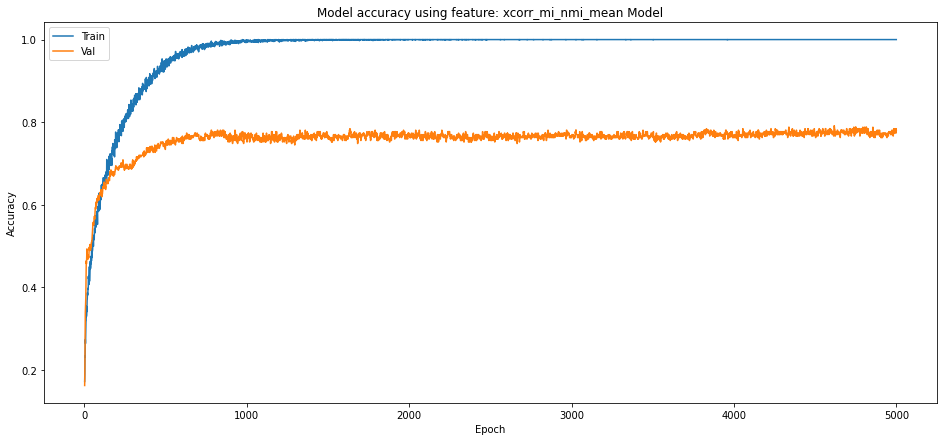

In [ ]:
srt="xcorr_mi_nmi_mean Model"
plot_accuracy(history8, no_of_epoch,srt)

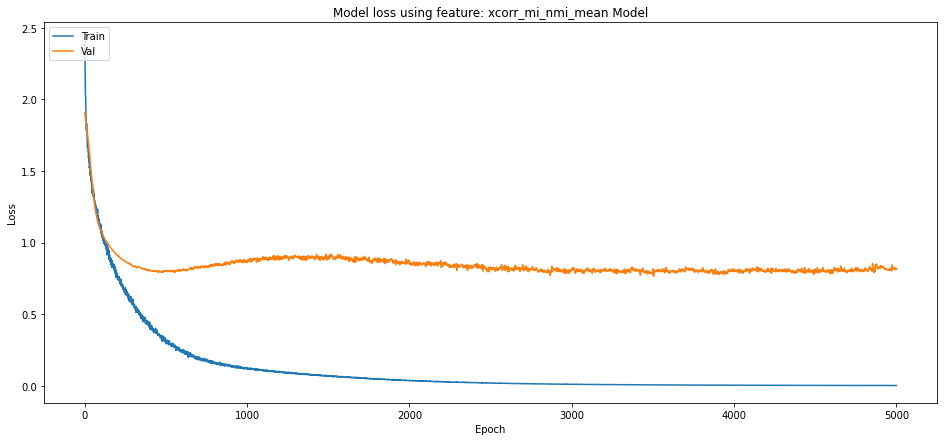

In [ ]:
plot_loss(history8,no_of_epoch, srt)

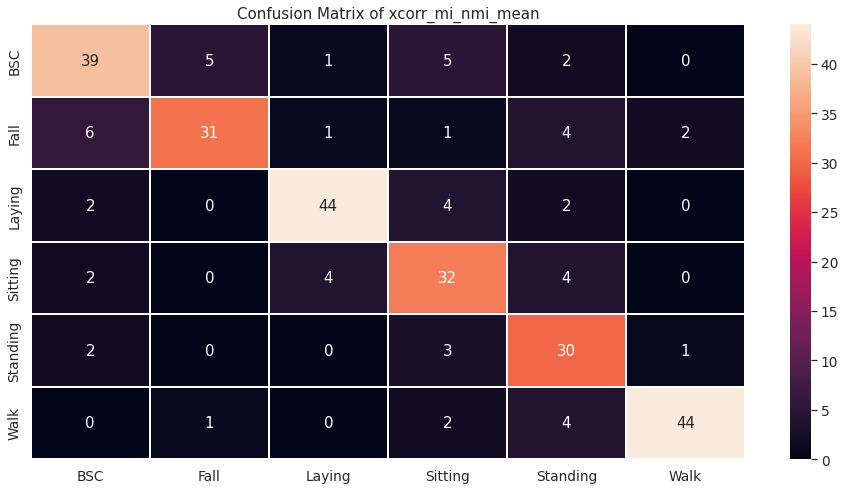

In [ ]:
title="Confusion Matrix of xcorr_mi_nmi_mean"
cm=confusion(y_pred,y_test)
conf_mat2(cm,class_names,title)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76        51
           1       0.69      0.84      0.76        37
           2       0.85      0.88      0.86        50
           3       0.76      0.68      0.72        47
           4       0.83      0.65      0.73        46
           5       0.86      0.94      0.90        47

    accuracy                           0.79       278
   macro avg       0.79      0.79      0.79       278
weighted avg       0.79      0.79      0.79       278



In [ ]:
modelp.save("xcorr_mi_nmi_mean.h5")
from google.colab import files
files.download("xcorr_mi_nmi_mean.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>